# Use Case 2: Compare Generation Methods for a Single Dataset
1. Load data
2. Generate synthetitc data using multiple generation methods
3. Compare results and determine the supirior method for the data in question

## Imports

In [66]:
from synthesizers import Load
import matplotlib.pyplot as plt
import pandas as pd
import pickle

## Load data and synthesize

In [67]:
gen_methods = ["tvae", "bayesian_network", "privbayes", "adsgan", "ctgan", "ddpm"]
result_name = "breasts_methods"

In [68]:
Load("mstz/breast"). Synthesize(split_size=0.8, train_plugin=gen_methods, gen_count=1000, n_jobs=len(gen_methods), eval_target_col="is_cancer").Save(result_name)

[2024-04-15T14:17:14.880700+0200][21254][CRITICAL] module disabled: /home/hyrup/PhD-local/projects/testing_synthesizer/venv/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
 35%|███▌      | 350/1000 [03:25<06:21,  1.71it/s]
[2024-04-15T14:20:40.197023+0200][21254][CRITICAL] module disabled: /home/hyrup/PhD-local/projects/testing_synthesizer/venv/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
[2024-04-15T14:20:45.720609+0200][21254][CRITICAL] module disabled: /home/hyrup/PhD-local/projects/testing_synthesizer/venv/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
100%|██████████| 9/9 [00:30<00:00,  3.35s/it]
[2024-04-15T14:21:16.262740+0200][21254][CRITICAL] module disabled: /home/hyrup/PhD-local/projects/testing_synthesizer/venv/lib/python3.10/site-packages/synthcity/plugins/generic/plugin_goggle.py
  3%|▎         | 349/10000 [01:49<50:40,  3.17it/s]  
[2024-04-15T14:23:06.336123+0200][21254][CRITICAL] module disable

[{'train':      clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
0                  3                        1                         1   
1                  3                        2                         2   
2                  5                        3                         2   
3                  2                        7                        10   
4                  4                        1                         1   
..               ...                      ...                       ...   
541               10                        8                         8   
542                5                        1                         1   
543                4                        1                         1   
544                6                        8                         7   
545                5                        6                         7   

     marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
0                   

## Read output files and comapare results

In [69]:
results = pd.DataFrame(columns=["f1_diff", "auroc_diff"])
for i in range(len(gen_methods)):
    eval = pickle.load(open(f"{result_name}/{i}/eval.pickle", "rb")).set_index("metric")
    results.loc[gen_methods[i]] = [eval.loc["cls_F1_diff", "val"], eval.loc["auroc", "val"]]

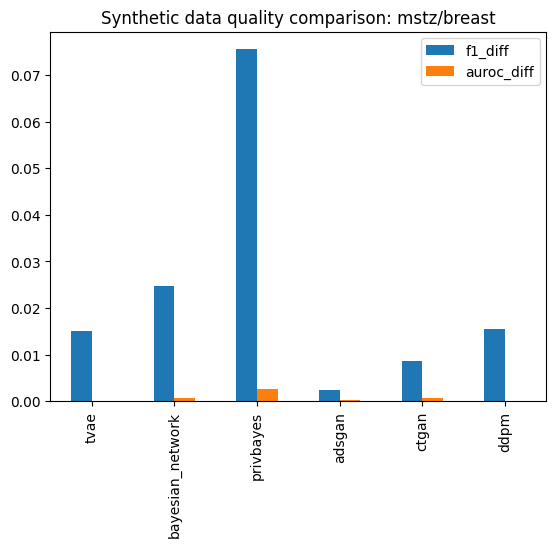

In [70]:
results.plot.bar()
plt.title("Synthetic data quality comparison: mstz/breast")
plt.show()

## With synthpop

In [ ]:
gen_methods = ["tvae", "bayesian_network", "privbayes", "adsgan", "ctgan", "ddpm"]
result_name = "breasts_methods_2"

Load("mstz/breast").Split(size=0.8).Train(train_adapter=["synthcity"], train_plugin=gen_methods).Generate(10000).Evaluate().Save(result_name)